In [6]:
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import xgboost as xgb
from xgboost import plot_tree

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
import seaborn as sns

from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

import sys
sys.path.insert(1, '../src/stproject')
from utils import *

In [7]:
def load_data_fe0(features_excluded, target):
    
    # function automatically exclude datapoints with non-zero entries in features_excluded
    # e.g. if aldehyde 'CHO' is excluded, any substance identified as aldehyde will be removed
    
    df = pd.read_csv('../data/df_fe0.csv', index_col=0)
    df = df[df[features_excluded].sum(axis=1) == 0]
    X = df[df.columns.difference(features_excluded + [target])]
    y = df[target]
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_valid, y_train, y_valid

In [8]:
def score(params):
    print("Training with params : ")
    print(params)
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)
    # watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    model = xgb.train(params, dtrain, num_round)
    predictions = model.predict(dvalid)
    score = np.sqrt(mean_squared_error(y_valid, predictions))
    print("\tScore {0}\n\n".format(score))
    return {'loss': score, 'status': STATUS_OK}

In [9]:
def optimize(trials):
    space = {
             'n_estimators' : hp.quniform('n_estimators', 100, 1000, 1),
             'eta' : hp.quniform('eta', 0.01, 0.10, 0.02),
             'max_depth' : hp.choice('max_depth', np.arange(1, 13, 1)),
             'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
             'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
             'gamma' : hp.quniform('gamma', 0.5, 1, 0.05),
             'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
             'eval_metric': 'rmse',
             'objective': 'reg:squarederror',
             'nthread' : 6,
             'silent' : 1,
             'seed': 42
             }

    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=250)

    print(best)

In [12]:
features_excluded = ['C#C', 'R3', 'R4', 'R7', 'R8', 'molecule']
X_train, X_valid, y_train, y_valid = load_data_fe0(features_excluded, 'measured_st')

In [13]:
# Trials object where the history of search will be stored
trials = Trials()
optimize(trials)

Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 10, 'min_child_weight': 2.0, 'n_estimators': 903.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9500000000000001}
	Score 1.7129473228752896                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 9, 'min_child_weight': 5.0, 'n_estimators': 729.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9500000000000001}
	Score 1.624321704657698                                                                                               


Training

	Score 1.556612391067169                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.75, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 1.0, 'max_depth': 8, 'min_child_weight': 3.0, 'n_estimators': 324.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 1.6124400840834345                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.8, 'max_depth': 3, 'min_child_weight': 1.0, 'n_estimators': 467.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9500000000000001}
	Score 1.6098212931611777

	Score 1.522168764370626                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 9, 'min_child_weight': 2.0, 'n_estimators': 153.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.5299856256161881                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 5, 'min_child_weight': 1.0, 'n_estimators': 279.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1

	Score 1.5675572163203477                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 3, 'min_child_weight': 2.0, 'n_estimators': 433.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.436972181005542                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 3, 'min_child_weight': 1.0, 'n_estimators': 379.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.448677697138095              

	Score 1.562170828477444                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 8, 'min_child_weight': 1.0, 'n_estimators': 200.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.75}
	Score 1.530330877752481                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.8, 'max_depth': 5, 'min_child_weight': 2.0, 'n_estimators': 452.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.4587120306184684                            

	Score 1.6286870148219137                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 2, 'min_child_weight': 4.0, 'n_estimators': 377.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.5984043713125213                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.8, 'max_depth': 10, 'min_child_weight': 2.0, 'n_estimators': 247.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.513230413394472

Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 3, 'min_child_weight': 2.0, 'n_estimators': 100.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.441760112234579                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.8, 'max_depth': 3, 'min_child_weight': 1.0, 'n_estimators': 108.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.5407378196212729                                                                                              


Training with params :                                  

	Score 1.5648670640134212                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 11, 'min_child_weight': 1.0, 'n_estimators': 492.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 1.5676510178907739                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.9500000000000001, 'max_depth': 3, 'min_child_weight': 3.0, 'n_estimators': 217.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.5

	Score 1.69892080718683                                                                                                


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 3, 'min_child_weight': 1.0, 'n_estimators': 205.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.5672360695405163                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 2, 'min_child_weight': 2.0, 'n_estimators': 355.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.4595180453416818             

	Score 1.5550343548414007                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.8, 'max_depth': 3, 'min_child_weight': 2.0, 'n_estimators': 152.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.75}
	Score 1.6043907558022306                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 2, 'min_child_weight': 2.0, 'n_estimators': 196.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.498127532123576

	Score 1.573143368195887                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 2, 'min_child_weight': 2.0, 'n_estimators': 773.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 1.5835613785810312                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 3, 'min_child_weight': 5.0, 'n_estimators': 101.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.7396634550389958             

Best rmse of 1.421 achieved with colsample_by_tree: 0.55, eta: 0.06, gamma: 0.80, max_depth: 2, min_child_weight: 2.0, n_estimators: 102, subsample: 0.5

In [14]:
# Training model with best params
xgb_best = xgb.XGBRegressor(n_estimators=102,
                            learning_rate=0.06,
                            max_depth=2,
                            min_child_weight=2,
                            subsample=0.5,
                            gamma=0.8,
                            colsample_by_tree=0.55,
                            objective='reg:squarederror',
                            n_jobs=6,
                            verbosity=3,
                           random_state=42)
xgb_best.fit(X_train, y_train, early_stopping_rounds=25, eval_set=[(X_valid, y_valid)])

[20:50:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[0]	validation_0-rmse:24.5677
Will train until validation_0-rmse hasn't improved in 25 rounds.
[20:50:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[1]	validation_0-rmse:23.1266
[20:50:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[2]	validation_0-rmse:21.7891
[20:50:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[3]	validation_0-rmse:20.5519
[20:50:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[4]	validation_0-rmse:19.3739
[20:50:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[5]	validation_0-rmse:18.2294
[20:50:20] INFO: src/tree/updater_prune.cc:74: tree p

[20:50:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[56]	validation_0-rmse:2.04364
[20:50:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[57]	validation_0-rmse:2.00502
[20:50:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[58]	validation_0-rmse:1.98703
[20:50:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[59]	validation_0-rmse:1.96327
[20:50:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[60]	validation_0-rmse:1.94893
[20:50:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[61]	validation_0-rmse:1.91874
[20:50:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_dep

XGBRegressor(colsample_by_tree=0.55, gamma=0.8, learning_rate=0.06, max_depth=2,
             min_child_weight=2, n_estimators=102, n_jobs=6,
             objective='reg:squarederror', random_state=42, subsample=0.5,
             verbosity=3)

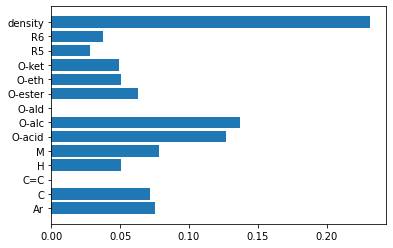

In [15]:
# feature importances
plt.barh(X_train.columns, xgb_best.feature_importances_)
plt.show()

In [1]:
# fig, ax = plt.subplots(figsize=(30, 30))
# plot_tree(xgb_best, ax=ax)

In [16]:
print(f"rmse = {np.sqrt(np.mean((xgb_best.predict(X_valid)-y_valid)**2))}")

rmse = 1.548637706530889


In [17]:
pd.DataFrame({'y_hat': xgb_best.predict(X_valid), 'y': y_valid})

,y_hat,y
120,19.902594,17.3
125,25.325747,25.4
290,27.484261,28.3
234,27.500797,28.3
69,33.068359,33.2
279,27.500797,28.3
184,23.762907,23.3
224,25.963202,26.6
10,25.539425,27.1
106,27.112534,27.4


TODOs by priority:

0. try features scaled by molecular weight, molecular fragments only
1. do the same with multiple train-test(valid) splitting + weighted prediction
2. use triple split: train, valid, test with test set matching the literature data df_stliq_clean was taken from
3. test each final model against feature-engineered polymer

## XGB with train, valid, test split

In [31]:
def load_data_fe0_2(features_excluded, target):
    df_ref = pd.read_csv('../data/df_stliq_clean.csv', index_col=0)
    df = pd.read_csv('../data/df_fe0.csv', index_col=0)
    df = df[df[features_excluded].sum(axis=1) == 0]
    
    # pulling index of test data from ref (original_id column contains 'Test')
    test_idx = df_ref[df_ref['original_id'].str.contains('Test')].index.tolist()
    df_train = df[~df.index.isin(test_idx)]
    df_test = df[df.index.isin(test_idx)]
    X_train = df_train[df_train.columns.difference(features_excluded + [target])]
    y_train = df_train[target]
    X_test = df_test[df_test.columns.difference(features_excluded + [target])]
    y_test = df_test[target]
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [45]:
X_train, X_valid, X_test, y_train, y_valid, y_test = \
load_data_fe0_2(features_excluded, 'measured_st')
len(X_train), len(X_valid), len(X_test)

(204, 36, 23)

In [21]:
# trials2 = Trials()
# optimize(trials2)

Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 11, 'min_child_weight': 1.0, 'n_estimators': 883.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 1.8203185175324585                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 7, 'min_child_weight': 3.0, 'n_estimators': 537.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 1.0}
	Score 1.882753034461569                                                                                               


Training with params :                

{'colsample_bytree': 1.0, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 2, 'min_child_weight': 4.0, 'n_estimators': 105.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8500000000000001}
	Score 4.329285928202944                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5.0, 'n_estimators': 342.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 1.6844195961050425                                                                                              


Training with params :                                                                                                 
{'colsample

	Score 1.7009661687717774                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.5, 'max_depth': 11, 'min_child_weight': 4.0, 'n_estimators': 568.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8}
	Score 1.6538163929074108                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 5, 'min_child_weight': 4.0, 'n_estimators': 511.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8500000000000001}
	Score 1.6

	Score 1.6723955287670238                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.8, 'max_depth': 9, 'min_child_weight': 4.0, 'n_estimators': 762.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.65}
	Score 1.736239247434565                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.75, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 5, 'min_child_weight': 3.0, 'n_estimators': 999.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 1.

	Score 1.709685694724411                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.8, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.5, 'max_depth': 1, 'min_child_weight': 4.0, 'n_estimators': 149.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.65}
	Score 1.7880664184903676                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.7000000000000001, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 4, 'min_child_weight': 5.0, 'n_estimators': 533.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 1.0}
	Score 1.6908279761797833               

	Score 1.6412281693970643                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.9500000000000001, 'max_depth': 7, 'min_child_weight': 4.0, 'n_estimators': 370.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8500000000000001}
	Score 1.6673555766892223                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 7, 'min_child_weight': 4.0, 'n_estimators': 399.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.85000000000000

	Score 2.0164590546194643                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 11, 'min_child_weight': 2.0, 'n_estimators': 433.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9500000000000001}
	Score 1.7760612155194202                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.8, 'max_depth': 10, 'min_child_weight': 3.0, 'n_estimators': 175.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.850000000000

	Score 1.717198197209544                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 4.0, 'n_estimators': 181.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8}
	Score 1.5849467920638904                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 4, 'min_child_weight': 5.0, 'n_estimators': 101.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 1.72

	Score 1.6187210615991892                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 11, 'min_child_weight': 6.0, 'n_estimators': 123.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8500000000000001}
	Score 1.7261981467595062                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.9500000000000001, 'max_depth': 1, 'min_child_weight': 4.0, 'n_estimators': 286.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8500000000000001}
	Score 1.

	Score 1.741173450250823                                                                                               


100%|███████████████████████████████████████████████| 250/250 [02:55<00:00,  1.42trial/s, best loss: 1.526425916265488]
{'colsample_bytree': 0.9500000000000001, 'eta': 0.06, 'gamma': 0.5, 'max_depth': 6, 'min_child_weight': 4.0, 'n_estimators': 248.0, 'subsample': 0.8500000000000001}


Best rmse of 1.526 achieved with colsample_by_tree: 0.95, eta: 0.06, gamma: 0.5, max_depth: 6, min_child_weight: 4.0, n_estimators: 248, subsample: 0.85

In [22]:
# check index consistency with 'append'
print(all(X_train.append(X_valid).index == y_train.append(y_valid).index))

True


In [33]:
# Training model with best params
xgb_best2_1 = xgb.XGBRegressor(n_estimators=248,
                            learning_rate=0.06,
                            max_depth=6,
                            min_child_weight=4,
                            subsample=0.85,
                            gamma=0.5,
                            colsample_by_tree=0.95,
                            objective='reg:squarederror',
                            n_jobs=6,
                            verbosity=3,
                            random_state=42)
xgb_best2_1.fit(X_train.append(X_valid), y_train.append(y_valid), eval_set=[(X_test, y_test)])

[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[0]	validation_0-rmse:26.0699
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[1]	validation_0-rmse:24.5919
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[2]	validation_0-rmse:23.1944
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[3]	validation_0-rmse:21.8493
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[4]	validation_0-rmse:20.591
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[5]	validation_0-rmse:19.4117
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[6

[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[56]	validation_0-rmse:2.15273
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[57]	validation_0-rmse:2.1117
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[58]	validation_0-rmse:2.07216
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=6
[59]	validation_0-rmse:2.03404
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=6
[60]	validation_0-rmse:1.99198
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 6 pruned nodes, max_depth=6
[61]	validation_0-rmse:1.97485
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, m

[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=6
[111]	validation_0-rmse:1.7009
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=6
[112]	validation_0-rmse:1.6938
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 10 pruned nodes, max_depth=6
[113]	validation_0-rmse:1.6865
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 6 pruned nodes, max_depth=6
[114]	validation_0-rmse:1.69306
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=6
[115]	validation_0-rmse:1.69265
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 8 pruned nodes, max_depth=6
[116]	validation_0-rmse:1.69779
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nod

[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=6
[166]	validation_0-rmse:1.71196
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=6
[167]	validation_0-rmse:1.71558
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 6 pruned nodes, max_depth=5
[168]	validation_0-rmse:1.71659
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 10 pruned nodes, max_depth=6
[169]	validation_0-rmse:1.7132
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=6
[170]	validation_0-rmse:1.71225
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 6 pruned nodes, max_depth=6
[171]	validation_0-rmse:1.70861
[21:56:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned 

[21:56:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 6 pruned nodes, max_depth=6
[221]	validation_0-rmse:1.70991
[21:56:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 24 pruned nodes, max_depth=2
[222]	validation_0-rmse:1.70903
[21:56:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=6
[223]	validation_0-rmse:1.70914
[21:56:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 14 pruned nodes, max_depth=6
[224]	validation_0-rmse:1.7059
[21:56:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 24 pruned nodes, max_depth=5
[225]	validation_0-rmse:1.7041
[21:56:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 14 pruned nodes, max_depth=6
[226]	validation_0-rmse:1.70694
[21:56:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned

XGBRegressor(colsample_by_tree=0.95, gamma=0.5, learning_rate=0.06, max_depth=6,
             min_child_weight=4, n_estimators=248, n_jobs=6,
             objective='reg:squarederror', random_state=42, subsample=0.85,
             verbosity=3)

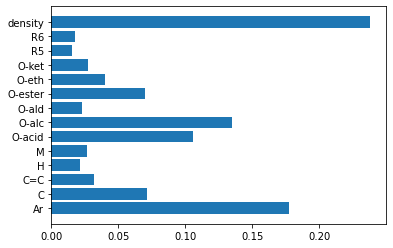

In [34]:
# feature importances
plt.barh(X_train.columns, xgb_best2_1.feature_importances_)
plt.show()

rmse of XGB with fe0 + full features  = 1.6988408642765038


Text(0.5, 1.0, 'XGB fe0 - full features')

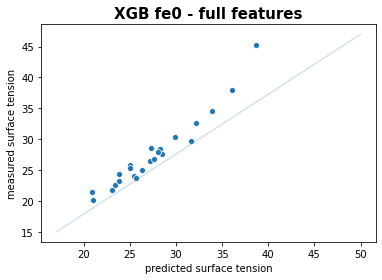

In [36]:
print(f"rmse of XGB with fe0 + full features  = {np.sqrt(mean_squared_error(y_test, xgb_best2_1.predict(X_test)))}")
sns.scatterplot(xgb_best2_1.predict(X_test), y_test)
sns.lineplot(x=[17, 50], y=[15, 47], alpha=0.2)
plt.xlabel('predicted surface tension')
plt.ylabel('measured surface tension')
plt.title('XGB fe0 - full features', {'fontsize': 15, 'weight': 'bold'})

## Fragments only (scaled by molecular weight)

In [37]:
def scale_M(df):
    # df contains all numeric features
    # this function drops 'density' feature and normalizes the molecular fragments by molecular weight
    return df[df.columns.difference(['density', 'M'])].divide(df['M'], axis=0)

In [38]:
X_train = scale_M(X_train)
X_valid = scale_M(X_valid)
X_test = scale_M(X_test)

In [39]:
trials3 = Trials()
optimize(trials3)

Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 12, 'min_child_weight': 1.0, 'n_estimators': 205.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.65}
	Score 3.259587499743536                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 6.0, 'n_estimators': 311.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8}
	Score 3.219353396290355                                                                                               


Training with params :                

	Score 3.4463299900838846                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 4, 'min_child_weight': 5.0, 'n_estimators': 227.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 3.320985645279353                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 5, 'min_child_weight': 2.0, 'n_estimators': 620.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0

	Score 3.140912768964615                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 1.0, 'max_depth': 3, 'min_child_weight': 1.0, 'n_estimators': 273.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 1.0}
	Score 3.4322502421644274                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.9500000000000001, 'max_depth': 6, 'min_child_weight': 2.0, 'n_estimators': 477.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8}
	Score 3.4282915431220964                

Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 10, 'min_child_weight': 2.0, 'n_estimators': 683.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 2.9503025339125646                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 2, 'min_child_weight': 3.0, 'n_estimators': 564.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 3.195938176734644                                                                                               


Training with params :   

{'colsample_bytree': 0.9, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 1, 'min_child_weight': 3.0, 'n_estimators': 412.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 3.6648682780448167                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 5, 'min_child_weight': 3.0, 'n_estimators': 929.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 3.1280397699853837                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.75

	Score 3.228580003240914                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 1.0, 'max_depth': 7, 'min_child_weight': 4.0, 'n_estimators': 470.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8}
	Score 3.2578003567641325                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.9500000000000001, 'max_depth': 5, 'min_child_weight': 2.0, 'n_estimators': 287.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 3.154268000885506  

	Score 2.9773989664657576                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 7, 'min_child_weight': 1.0, 'n_estimators': 802.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 3.187573355398703                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 7, 'min_child_weight': 1.0, 'n_estimators': 859.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 2.920867961282104                 

	Score 3.0156740055395796                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 7, 'min_child_weight': 2.0, 'n_estimators': 999.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 3.1327049726372858                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 1.0, 'max_depth': 11, 'min_child_weight': 1.0, 'n_estimators': 839.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8500000000000001}
	Score 3.39

	Score 3.6760815484458083                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 1.0, 'max_depth': 5, 'min_child_weight': 2.0, 'n_estimators': 435.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.9500000000000001}
	Score 3.4079687511473553                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.75, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.9500000000000001, 'max_depth': 12, 'min_child_weight': 1.0, 'n_estimators': 614.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 3.1

	Score 3.570968945041069                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.8, 'max_depth': 3, 'min_child_weight': 2.0, 'n_estimators': 354.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 3.171160578615723                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 6, 'min_child_weight': 1.0, 'n_estimators': 102.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 3.0978763137986665 

	Score 3.3773611624052364                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 1.0, 'max_depth': 12, 'min_child_weight': 1.0, 'n_estimators': 245.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 3.0143540500678196                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 9, 'min_child_weight': 1.0, 'n_estimators': 557.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8}
	Score 3.5981301573662394               

	Score 3.1630997644410837                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 4, 'min_child_weight': 4.0, 'n_estimators': 551.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 2.9987459799376235                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 6, 'min_child_weight': 1.0, 'n_estimators': 449.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 2.8993570175669583                

In [40]:
# Training model with best params
xgb_best3 = xgb.XGBRegressor(n_estimators=472,
                            learning_rate=0.08,
                            max_depth=4,
                            min_child_weight=1,
                            subsample=0.5,
                            gamma=1,
                            colsample_by_tree=1,
                            objective='reg:squarederror',
                            n_jobs=6,
                            verbosity=3,
                            random_state=42)
xgb_best3.fit(X_train.append(X_valid), y_train.append(y_valid), early_stopping_rounds=25, eval_set=[(X_test, y_test)])

[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[0]	validation_0-rmse:25.5739
Will train until validation_0-rmse hasn't improved in 25 rounds.
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[1]	validation_0-rmse:23.7074
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[2]	validation_0-rmse:22.0151
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[3]	validation_0-rmse:20.4757
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[4]	validation_0-rmse:19.0012
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[5]	validation_0-rmse:17.6958
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree p

[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[55]	validation_0-rmse:2.78988
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[56]	validation_0-rmse:2.81343
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 4 pruned nodes, max_depth=4
[57]	validation_0-rmse:2.80791
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[58]	validation_0-rmse:2.80628
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[59]	validation_0-rmse:2.75672
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[60]	validation_0-rmse:2.74487
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, m

[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 4 pruned nodes, max_depth=4
[111]	validation_0-rmse:2.43338
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 4 pruned nodes, max_depth=4
[112]	validation_0-rmse:2.437
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_depth=4
[113]	validation_0-rmse:2.43757
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[114]	validation_0-rmse:2.43965
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=4
[115]	validation_0-rmse:2.45571
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[116]	validation_0-rmse:2.42745
[22:04:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nod

XGBRegressor(colsample_by_tree=1, gamma=1, learning_rate=0.08, max_depth=4,
             n_estimators=472, n_jobs=6, objective='reg:squarederror',
             random_state=42, subsample=0.5, verbosity=3)

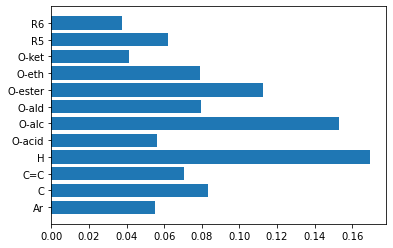

In [41]:
# feature importances
plt.barh(X_train.columns, xgb_best3.feature_importances_)
plt.show()

rmse of XGB with fe0 + features/M  = 2.341115282097194


Text(0.5, 1.0, 'XGB fe0 - full features')

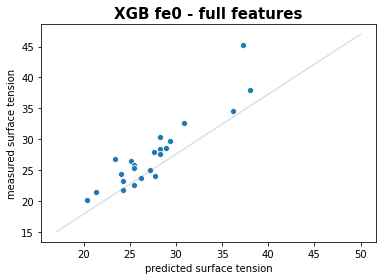

In [42]:
print(f"rmse of XGB with fe0 + features/M  = {np.sqrt(mean_squared_error(y_test, xgb_best3.predict(X_test)))}")
sns.scatterplot(xgb_best3.predict(X_test), y_test)
sns.lineplot(x=[17, 50], y=[15, 47], alpha=0.2)
plt.xlabel('predicted surface tension')
plt.ylabel('measured surface tension')
plt.title('XGB fe0 - features/M', {'fontsize': 15, 'weight': 'bold'})

## Fragments only (scaled by density)

In [43]:
def scale_density(df):
    # df contains all numeric features
    # this function drops 'density' feature and normalizes the molecular fragments by molecular weight
    return df[df.columns.difference(['density', 'M'])].divide(df['density'], axis=0)

In [46]:
X_train = scale_density(X_train)
X_valid = scale_density(X_valid)
X_test = scale_density(X_test)

In [47]:
trials4 = Trials()
optimize(trials4)

Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.75, 'max_depth': 8, 'min_child_weight': 4.0, 'n_estimators': 423.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8500000000000001}
	Score 4.100669367225422                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 1.0, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 7, 'min_child_weight': 3.0, 'n_estimators': 523.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.5}
	Score 4.045163220266276                                                                                               


Training with params :  

	Score 3.9473863830887024                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.04, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 8, 'min_child_weight': 5.0, 'n_estimators': 607.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 4.079938603404042                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.02, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 11, 'min_child_weight': 2.0, 'n_estimators': 711.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 

	Score 3.7351846093649232                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 3, 'min_child_weight': 2.0, 'n_estimators': 843.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 1.0}
	Score 4.095628715449219                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.55, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 3, 'min_child_weight': 1.0, 'n_estimators': 993.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.8500000000000001}
	Score 3.655048777345309

{'colsample_bytree': 0.6000000000000001, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.65, 'max_depth': 7, 'min_child_weight': 1.0, 'n_estimators': 596.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 3.869811626677454                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.8, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 1, 'min_child_weight': 3.0, 'n_estimators': 830.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 3.6847144283647277                                                                                              


Training with params :                                                                                              

	Score 3.694880222371322                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.75, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.9500000000000001, 'max_depth': 2, 'min_child_weight': 1.0, 'n_estimators': 932.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.65}
	Score 3.520909760344262                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 1.0, 'max_depth': 2, 'min_child_weight': 1.0, 'n_estimators': 970.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 3.65971482987305

	Score 4.089234956777346                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.55, 'max_depth': 1, 'min_child_weight': 1.0, 'n_estimators': 456.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.65}
	Score 4.040757670837191                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'max_depth': 2, 'min_child_weight': 1.0, 'n_estimators': 410.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.55}
	Score 3.73399633616829

	Score 3.7809370279428527                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.9500000000000001, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 1, 'min_child_weight': 2.0, 'n_estimators': 792.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 3.6204947525743902                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 4, 'min_child_weight': 1.0, 'n_estimators': 910.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.

	Score 3.674255650157525                                                                                               


Training with params :                                                                                                 
{'colsample_bytree': 0.6000000000000001, 'eta': 0.06, 'eval_metric': 'rmse', 'gamma': 0.8, 'max_depth': 4, 'min_child_weight': 2.0, 'n_estimators': 691.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 3.7543311296254447                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.8, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.6000000000000001, 'max_depth': 3, 'min_child_weight': 4.0, 'n_estimators': 140.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.700000000000000

	Score 3.8010830826735345                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.65, 'eta': 0.08, 'eval_metric': 'rmse', 'gamma': 0.9, 'max_depth': 2, 'min_child_weight': 2.0, 'n_estimators': 810.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.6000000000000001}
	Score 3.5762597374328697                                                                                              


Training with params :                                                                                                 
{'colsample_bytree': 0.5, 'eta': 0.1, 'eval_metric': 'rmse', 'gamma': 0.8500000000000001, 'max_depth': 10, 'min_child_weight': 1.0, 'n_estimators': 893.0, 'nthread': 6, 'objective': 'reg:squarederror', 'seed': 42, 'silent': 1, 'subsample': 0.7000000000000001}
	Score 4.0

# Preparation of test set

In [25]:
df_test = pd.read_csv('../data/polyesters.csv')
df_diols_fe1 = pd.read_csv('../data/df_diols_fe1.csv', index_col=0)
df_acids_fe1 = pd.read_csv('../data/df_acids_fe1.csv', index_col=0)

# correcting 'O-alc', 'O-acid' and 'O-ester' by subtracting atom/functional group loss from condensation
df_diols_fe1['OH'] -= 2
df_acids_fe1['COOH'] -= 2
df_acids_fe1['COOR'] += 2

df_monomers_fe1 = pd.concat([df_diols_fe1, df_acids_fe1])
df_monomers_fe1

monomers = df_test.columns[df_test.columns.str.contains('diol|acid')]
features = df_monomers_fe1.columns

df_test_fe1 = avg_monomer_features(df_test, df_monomers_fe1, monomers, features)
st_test = df_test['measured_st']

### TEST 3

In [29]:
X_test3 = (df_test_fe1[df_test_fe1.columns.difference(['M']+features_excluded)]
           .divide(df_test_fe1['M']-18, axis=0))
y_hat_test3 = xgb_best3.predict(X_test3)

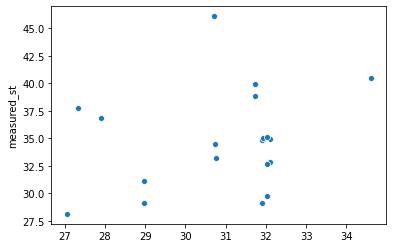

In [33]:
sns.scatterplot(y_hat_test3, st_test)

In [34]:
print(f"rmse = {np.sqrt(np.mean((y_hat_test3-st_test)**2))}")

rmse = 5.882487733694858
